# Mini project to analyse purchase data from the STEAM platform



---



## Define the Problem



---



The STEAM games platform provides a subscription service for players and a platform for purchasing games.  Users on the STEAM platform often try out a game before purchasing but some just visit the site to purchase new games.  Each user has a unique ID.

STEAM publish various statistics, like the top games by number of online players, but there are interesting questions to ask about purchased games.

How many different games are purchased by each user and what is the average number of games per user?  

How many different users purchased each game which are the top 10 most popular games?

Knowing the answers to these questions, it will be possible to identify the most popular games and the most active users.  The plaform operators might start to offer rewards for high levels of activity on the platform, or discount offers for those who buy fewer games.

## Collect the Data


---

## Data collection

A file of data from the STEAM platform has already been collected.  It is not the most up to date but the data is quite specific for this problem and gives an insight into what could be done on an ongoing basis to have these types of insight regularly available.  It was originally collected from the STEAM site and is made available for you to use for this purpose.

File:  https://docs.google.com/spreadsheets/d/1jIla2fCpkdMYgh9rq0icScURjMravr7nUHFCXvV-rXE/edit?usp=drive_link

Make a copy of the data and explore (in Google sheets).  Save this copy on your Google Drive

## Clean and Transform


---



## Use Google sheets to create a clean copy of the data containing ONLY the purchased games records.

Decide what columns are needed and what you need to do to produce a clean, valid dataset, with column headings.  

Notice any items that look different (maybe numbers rather than text, any missing values, etc, and correct these.

When it is ready, download it as a CSV file, then upload the CSV file back to your Google Drive.

Use the code below to read the CSV file from the Google Drive.

For reference, see these worksheets:  
[18_Opening_and_saving_files_locally_and_on_Google_Drive.ipynb
](https://colab.research.google.com/drive/1gd1_2Ha1ouRec5ueLre1L3W374PZKkf2?usp=drive_link)  


In [2]:
import pandas as pd
from google.colab import drive

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  folderpath = "/content/drive/MyDrive/"
  return folderpath

def get_data(path):
  try:
    df = pd.read_csv(path + "/steam_data.csv")
    return df
  except:
    print("There was a problem and the file could not be opened.")

# read the data from the file into the variable df, then display the data.  The data in df will be available in cells further down.
path = mount_drive()
df = get_data(path)
display(df)

Mounted at /content/drive


,151603712,The Elder Scrolls V Skyrim,purchase
0,151603712,The Elder Scrolls V Skyrim,play
1,151603712,Fallout 4,purchase
2,151603712,Fallout 4,play
3,151603712,Spore,purchase
4,151603712,Spore,play
...,...,...,...
199994,128470551,Titan Souls,play
199995,128470551,Grand Theft Auto Vice City,purchase
199996,128470551,Grand Theft Auto Vice City,play
199997,128470551,RUSH,purchase


Below I will create a list of unique user numbers and print this. I will also create a list of unique games and print this.


In [3]:
import pandas as pd

# Load the dataset
file_path = (path + "/steam_data.csv")
df = pd.read_csv(file_path)

# Filter to include only 'purchase' actions
purchase_data = df[df.iloc[:, 2] == 'purchase']

# Rename columns for clarity
purchase_data.columns = ['UserID', 'GameName', 'Action']

# Create a list of unique user numbers
unique_users = purchase_data['UserID'].unique().tolist()

# Create a list of unique games
unique_games = purchase_data['GameName'].unique().tolist()

# Print the lists
print("Unique Users:", unique_users)
print("Unique Games:", unique_games)


Unique Users: [151603712, 187131847, 59945701, 53875128, 234941318, 140954425, 26122540, 176410694, 197278511, 150128162, 197455089, 63024728, 297811211, 76933274, 218323237, 302186258, 126340495, 256193015, 194895541, 30007387, 170625356, 159538705, 167362888, 208649703, 299889828, 225987202, 195071563, 254906420, 247160953, 308653033, 144138643, 197902002, 97298878, 173909336, 198572546, 219509107, 202906503, 92107940, 251431515, 233558010, 99189757, 30695285, 259648553, 201069271, 48845802, 226212066, 221430493, 62923086, 250006052, 65117175, 227944885, 144004384, 236557903, 11373749, 140293612, 187851224, 192921532, 54103616, 222277839, 298547051, 264253640, 125718844, 230599183, 280061602, 38763767, 164543231, 211277578, 214167822, 163617342, 295931968, 196354657, 165034415, 298389371, 27543430, 126640783, 119410870, 243440565, 157694162, 154868247, 263856756, 124395695, 126656629, 197821092, 294797577, 228507886, 272425320, 49769103, 202742019, 239397807, 65758675, 239921853, 300

## Analyse
---



In [8]:
import pandas as pd

# Load the dataset
file_path = (path + "/steam_data.csv")
df = pd.read_csv(file_path)

# Filter to include only 'purchase' actions
purchase_data = df[df.iloc[:, 2] == 'purchase']

# Rename columns for clarity
purchase_data.columns = ['UserID', 'GameName', 'Action']

# Save the updated dataset to a new CSV file
output_file = 'steam_purchases.csv'
purchase_data.to_csv(output_file, index=False)

# Provide download link for Google Colab
from google.colab import files
files.download(output_file)

# Explore the data by looking at the range of unique categorical values present
unique_users = purchase_data['UserID'].unique().tolist()
unique_games = purchase_data['GameName'].unique().tolist()

print(f"Number of unique users: {len(unique_users)}")
print(f"Number of unique games: {len(unique_games)}")

# Create a new set of data showing games by number of user purchases
games_by_user_purchases = purchase_data.groupby('GameName')['UserID'].nunique().reset_index(name='NumberOfPurchases')

# Create a new set of data showing users by number of games each has purchased
users_by_games_purchased = purchase_data.groupby('UserID')['GameName'].nunique().reset_index(name='NumberOfGamesPurchased')

# Calculate the mean number of games per user
mean_games_per_user = users_by_games_purchased['NumberOfGamesPurchased'].mean()

print(f"Mean number of games per user: {mean_games_per_user}")

# Describe your findings
print("\nFindings:")
print(f"There are {len(unique_users)} unique users and {len(unique_games)} unique games in the dataset.")
print("The games with the highest number of user purchases are:")
print(games_by_user_purchases.sort_values(by='NumberOfPurchases', ascending=False).head(10))
print("The users with the highest number of games purchased are:")
print(users_by_games_purchased.sort_values(by='NumberOfGamesPurchased', ascending=False).head(10))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of unique users: 12393
Number of unique games: 5155
Mean number of games per user: 10.393205842007585

Findings:
There are 12393 unique users and 5155 unique games in the dataset.
The games with the highest number of user purchases are:
                             GameName  NumberOfPurchases
1336                           Dota 2               4841
4257                  Team Fortress 2               2323
4788                         Unturned               1563
981   Counter-Strike Global Offensive               1412
2074           Half-Life 2 Lost Coast                981
984             Counter-Strike Source                978
2475                    Left 4 Dead 2                951
978                    Counter-Strike                856
4899                         Warframe                847
2071           Half-Life 2 Deathmatch                823
The users with the highest number of games purchased are:
        UserID  NumberOfGamesPurchased
1729  62990992                  

## Interpret and Visualise


---



## Tell the Story



---



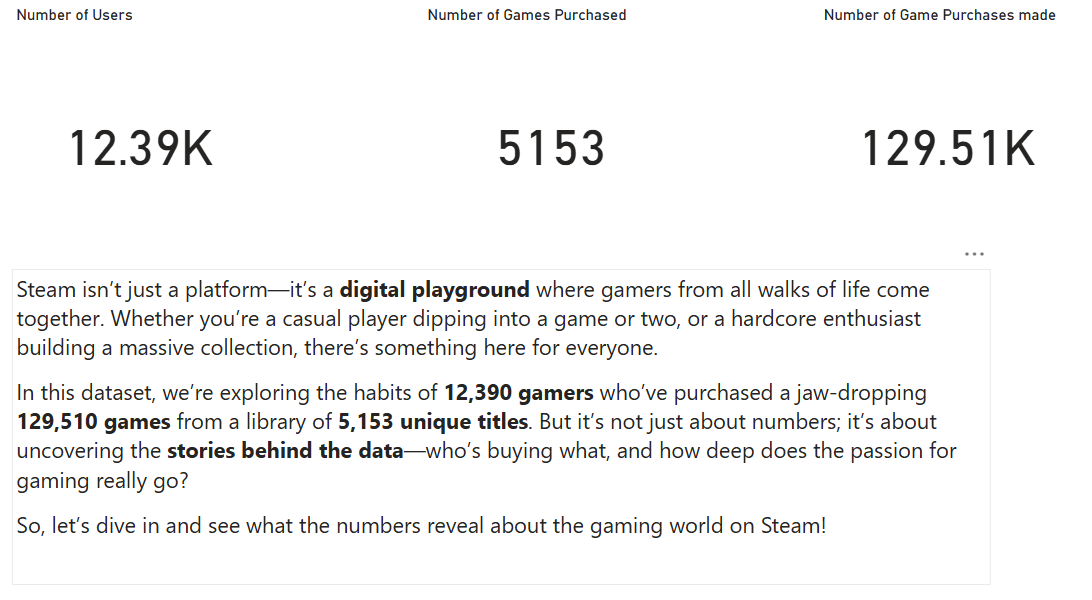

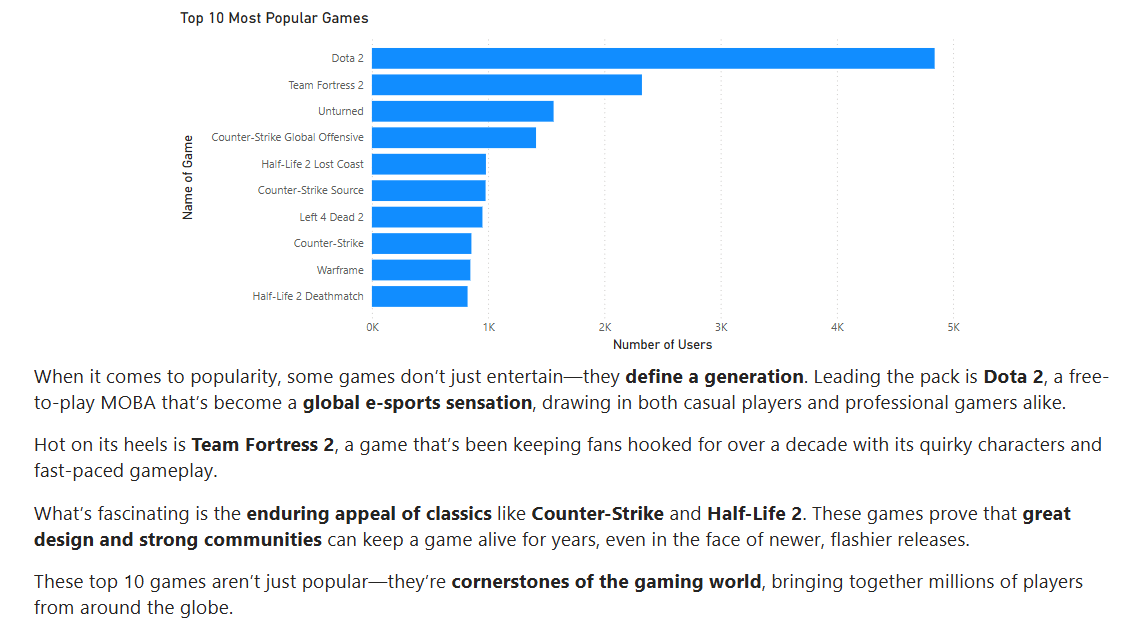

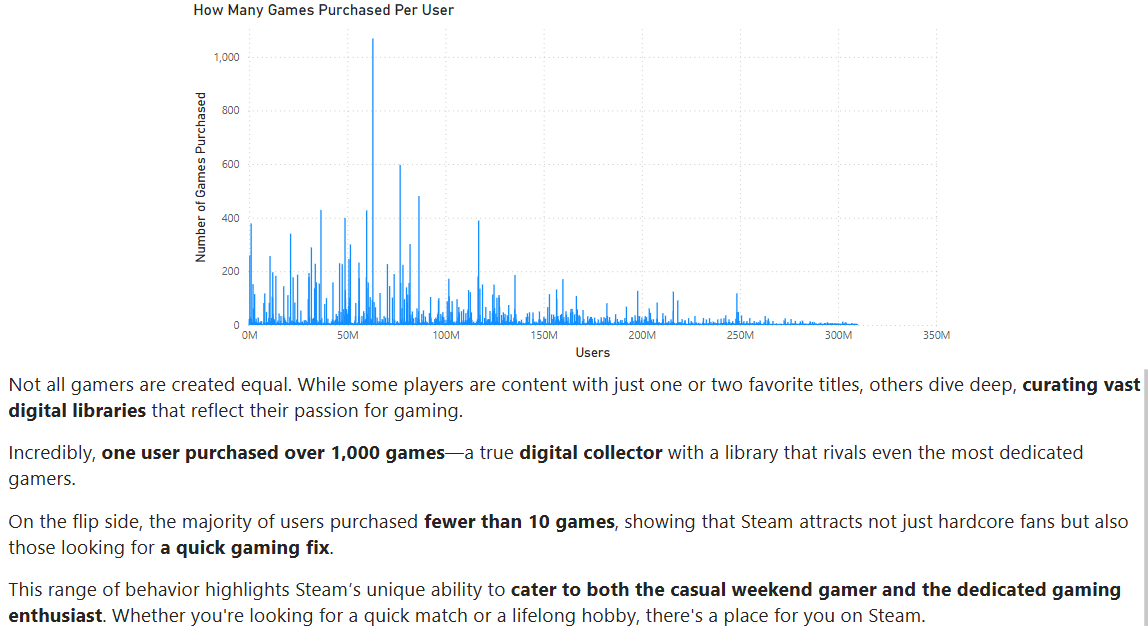

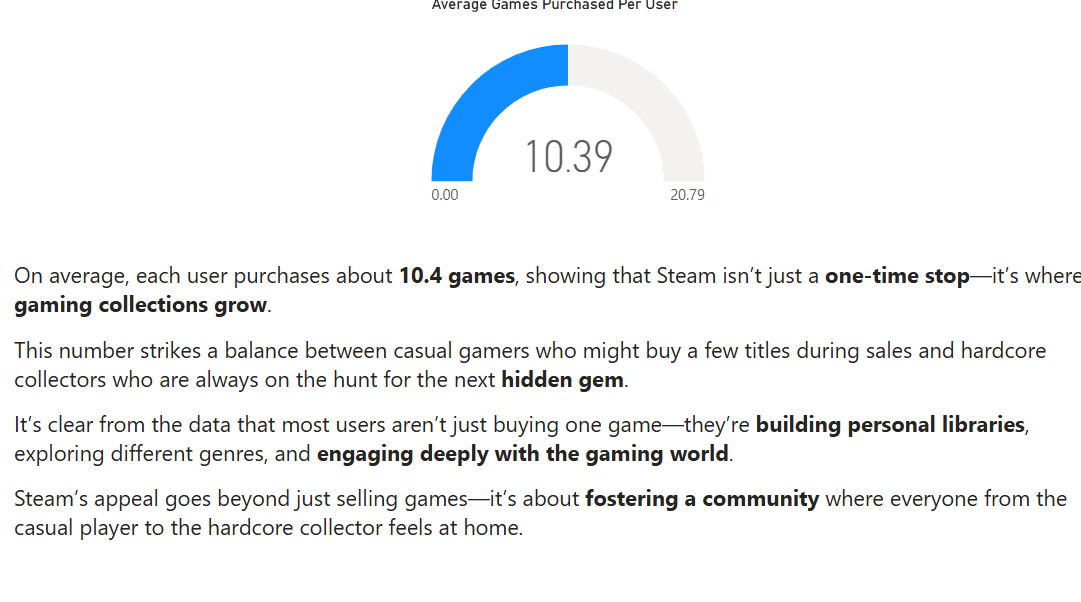

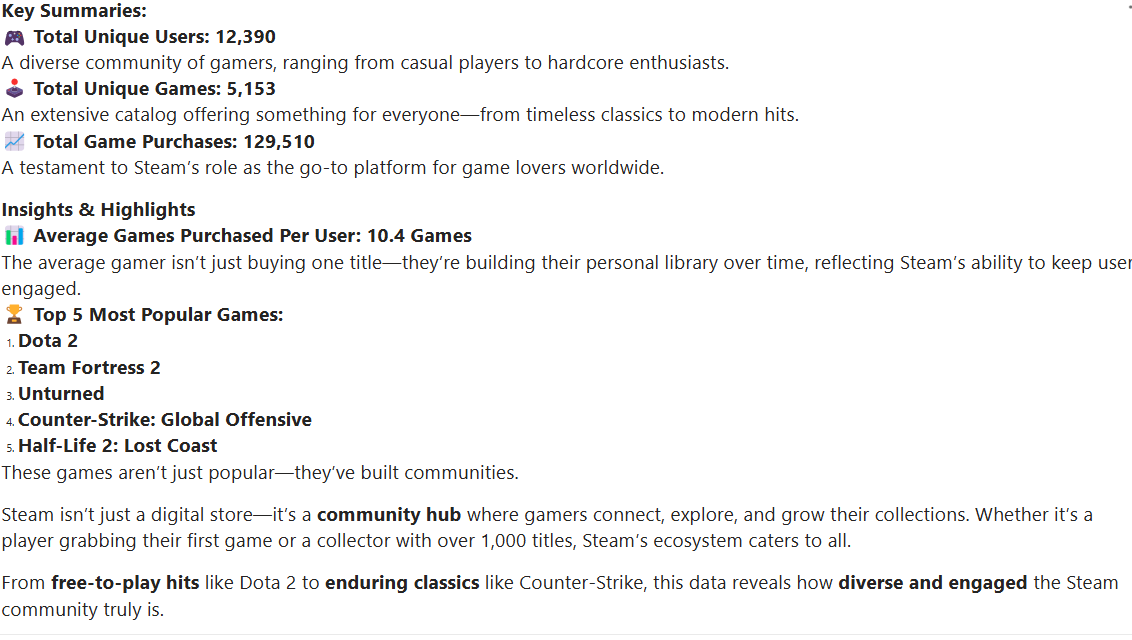

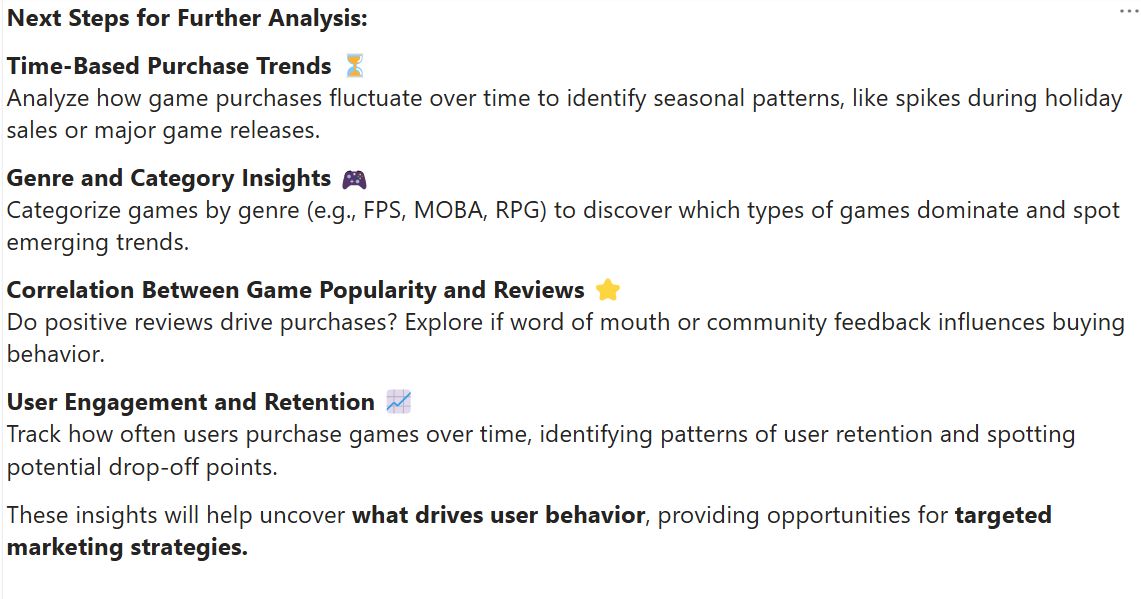

## Evaluate the Process


---



This project has so far been the easier project to complete and I enjoed completing it as I have an interest in gaming. I have learnt no matter how big or small the project is it takes time to complete each step of the data life cycle. It is also important to understand your dataset and spend time understanding what is important/relevant.